# Machine learning for dimension reduction

In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## The data: Visualize the set of temporal signals using a different color for each signal

Text(0.5, 1.0, 'All signals')

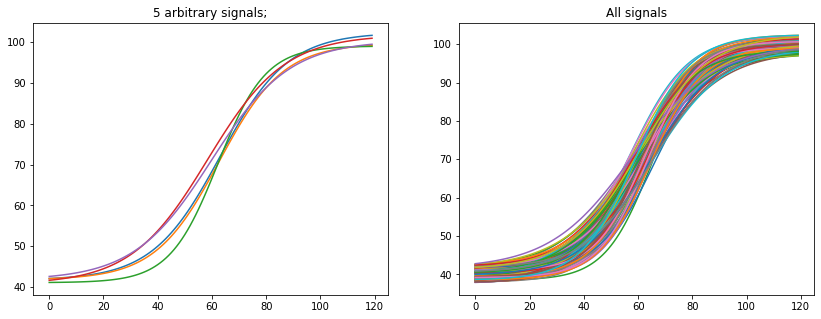

In [16]:
tab = pd.read_csv("/content/drive/MyDrive/sigref.csv",header=None);
t=np.array(tab);
n=len(t);
X = t.reshape(100,120)
x = np.arange(0,120)
random_row = np.random.randint(low=0, high=100, size=5)
randPlot = X[random_row,:]
figure = plt.figure(figsize=(14,5));
ax = plt.subplot(1,2, 1); 
ax.plot(x, randPlot.T)
ax.set_title('5 arbitrary signals;')
ax = plt.subplot(1,2, 2); 
ax.plot(x, X.T)
ax.set_title('All signals')




## PCA on functional data

In [17]:
mean = np.mean(X, axis=0)
X = X - mean

In [18]:
covariance = np.cov(X.T)
W, V = np.linalg.eig(covariance)
U, E, V2 = np.linalg.svd(covariance, full_matrices=True)
V = V2

In [19]:
ind = np.argsort(W)
reverseTab = ind[::-1]
VSorted = V[reverseTab,:]


### Eigenvectors of the PCA axes

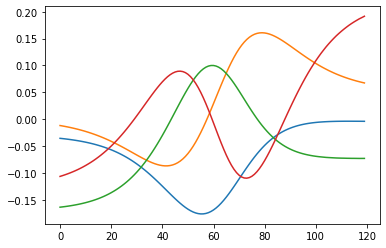

In [20]:
x = np.arange(0,120)
randPlot = VSorted[0:4,:]
plt.plot(x, randPlot.T)
plt.show()


## My own python instructions for reconstruction of signal with help of the ML slides lesson

In [21]:
def y_j_k(j, k):
    res = 0.0
    res_form = np.vdot(X[j], VSorted[k,:])
    return res_form

yjk = y_j_k(1,6)
print(yjk)

0.014484300851852316


In [22]:
def reconstruction_interm(J, j, X):
    res = np.zeros(X.shape[1])
    test = 0
    for k in range(J):
        res = res + y_j_k(j,k)*VSorted[k,:]
    return res

def reconstruction(J, mean, X):
    mat = np.zeros(X.shape)
    for i in range(X.shape[0]):
        mat[i] = mean + reconstruction_interm(J, i, X)
    return mat

Text(0.5, 1.0, 'Reconstruction 4 components')

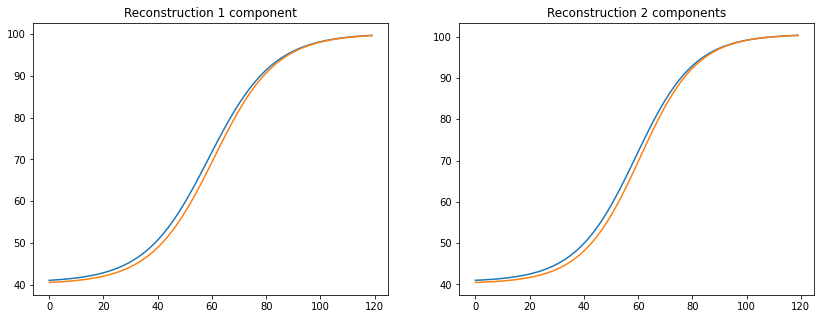

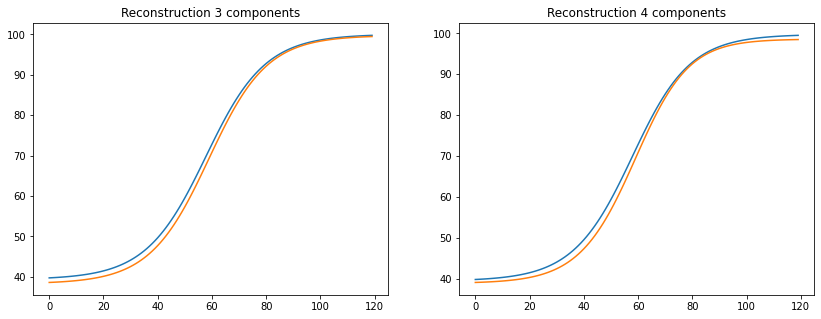

In [23]:
proj = []
n = 100
K = 1


        
reconstruct1 = reconstruction(1, mean, X)

reconstruct2 = reconstruction(2, mean, X)

reconstruct3 = reconstruction(3, mean, X)

reconstruct4 = reconstruction(4, mean, X)

x = np.arange(0,120)
figure = plt.figure(figsize=(14,5));

ax = plt.subplot(1,2, 1); 
ax.plot(x, reconstruct1[:2].T)
ax.set_title('Reconstruction 1 component')

ax = plt.subplot(1,2, 2); 
ax.plot(x, reconstruct2[:2].T)
ax.set_title('Reconstruction 2 components')

figure = plt.figure(figsize=(14,5));
ax2 = plt.subplot(1,2, 1);
ax2.plot(x, reconstruct3[:2].T)
ax2.set_title('Reconstruction 3 components')

ax2 = plt.subplot(1,2, 2); 
ax2.plot(x, reconstruct4[:2].T)
ax2.set_title('Reconstruction 4 components')
#ax.set_title('5 arbitrary signals;')

## Mean Square Error

In [24]:
pca = PCA(n_components=7, svd_solver='full')
pca.fit(X)
pca.components_.shape

(7, 120)

In [25]:
from sklearn.metrics import mean_squared_error

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


In [26]:
MSE1 = rmse(reconstruct1, X)
MSE2 = rmse(reconstruct2, X)
MSE3 = rmse(reconstruct3, X)
MSE4 = rmse(reconstruct4, X)
print(MSE1)
print(MSE2)
print(MSE3)
print(MSE4)

73.05288986196453
73.04204056715687
73.03916636175931
73.03824611278479


## Parametric modeling of the principal components

In [33]:
matProj1 = np.zeros(X.shape[0])
matProj2 = np.zeros(X.shape[0])
matProj3 = np.zeros(X.shape[0])
matProj4 = np.zeros(X.shape[0])

for i in range(X.shape[0]):
    matProj1[i] = y_j_k(i, 1)
    
for i in range(X.shape[0]):
    matProj2[i] = y_j_k(i, 2)

for i in range(X.shape[0]):
    matProj3[i] = y_j_k(i, 3)

for i in range(X.shape[0]):
    matProj4[i] = y_j_k(i, 4)

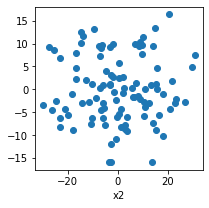

In [34]:
figure = plt.figure(figsize=(3,3));
plt.scatter(matProj1, matProj2)
plt.xlabel("x1"); plt.xlabel("x2");

## The empirical densities using the Henry line too:  1st component

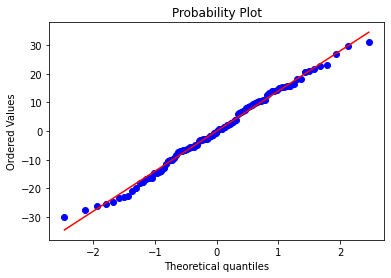

In [43]:
import numpy as np
import pylab
import scipy.stats as stats
data=matProj1;

stats.probplot(data, dist="norm", plot=pylab)
pylab.show()

## Shapiro Test: 1st component

In [44]:
from scipy.stats import shapiro
data=matProj1
stat, p=shapiro(data)
print('stat=%.3f, p=%.3f'%(stat, p))
if p > 0.05:
    print("Data follows Normal Distribution")
else:
    print("Data does not follow Normal Distribution")

stat=0.990, p=0.633
Data follows Normal Distribution


## The empirical densities using the Henry line tool: 2nd component

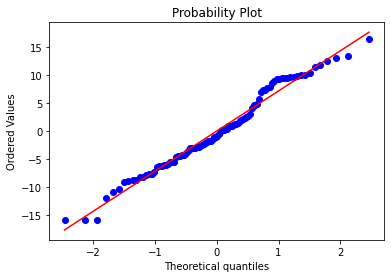

In [45]:
import numpy as np
import pylab
import scipy.stats as stats
data=matProj2;

stats.probplot(data, dist="norm", plot=pylab)
pylab.show()

## Shapiro Test: 2nd component

In [46]:
from scipy.stats import shapiro
data=matProj2
stat, p=shapiro(data)
print('stat=%.3f, p=%.3f'%(stat, p))
if p > 0.05:
    print("Data follows Normal Distribution")
else:
    print("Data does not follow Normal Distribution")

stat=0.978, p=0.091
Data follows Normal Distribution


## The empirical densities using the Henry line tool:  3rd component

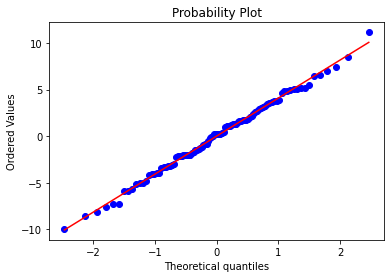

In [47]:
import numpy as np
import pylab
import scipy.stats as stats
data=matProj3;

stats.probplot(data, dist="norm", plot=pylab)
pylab.show()

## Shapiro Test 3rd component

In [48]:
from scipy.stats import shapiro
data=matProj3
stat, p=shapiro(data)
print('stat=%.3f, p=%.3f'%(stat, p))
if p > 0.05:
    print("Data follows Normal Distribution")
else:
    print("Data does not follow Normal Distribution")

stat=0.996, p=0.992
Data follows Normal Distribution


### The empirical densities using the Henry line tool: last component

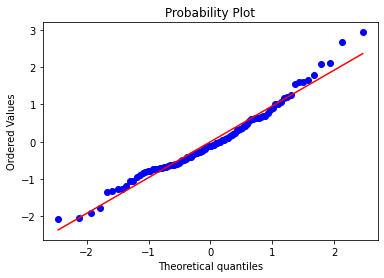

In [49]:
import numpy as np
import pylab
import scipy.stats as stats
data=matProj4;

stats.probplot(data, dist="norm", plot=pylab)
pylab.show()

## Shapiro Test last component

In [50]:
from scipy.stats import shapiro
data=matProj4
stat, p=shapiro(data)
print('stat=%.3f, p=%.3f'%(stat, p))
if p > 0.05:
    print("Data follows Normal Distribution")
else:
    print("Data does not follow Normal Distribution")

stat=0.974, p=0.043
Data does not follow Normal Distribution
